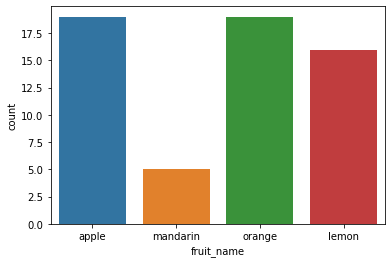

In [17]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#TASK 1 : reading in the csv file
fruit_data = pd.read_table("C:/Users/latma/OneDrive/Documents/ComputerScience_Yr2/Machine_Learning/data sets/fruit_data_with_colors.txt")
fruit_data.head()

#displaying a pretty bar chart of the values
sns.countplot(x = "fruit_name", data = fruit_data)
plt.show()


In [22]:
#TASK 2 :
fruit_vector=fruit_data[["mass","width","height","color_score", "fruit_name"]]
fruit_vector.head()
#Extract the mass, width, height and color_score data from the test set as variable X
#and fruit_name as y
X = fruit_vector.iloc[:,:-1].values #all rows, all columns up to the end. .values returns a numpy
y = fruit_vector.iloc[:, -1].values # all the rows, only column 4 (could also write [:, -1])
#print(X[0:4])
#print(y[0:4])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4321)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("kNN %):", metrics.accuracy_score(y_test, y_pred)*100)



[[4 0 0 3]
 [0 2 0 0]
 [0 3 0 0]
 [0 0 0 6]]
kNN %): 66.66666666666666


In [ ]:
#TASK 3 : Naive Bayes version
classifier_B = sklearn.naive_bayes.GaussianNB()
classifier_B.fit(X_train, y_train)
y_pred_B = classifier_B.predict(X_test)
print(confusion_matrix(y_test, y_pred_B))
print("Naive Bayes %):", metrics.accuracy_score(y_test, y_pred_B)*100)


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

fruit_data = pd.read_table("C:/Users/latma/OneDrive/Documents/ComputerScience_Yr2/Machine_Learning/data sets/fruit_data_with_colors.txt")
#fruit_data.head()

#TASK 4: Gaussian Maive Bayes
fruit_full = fruit_data[["mass","width","height","color_score", "fruit_name"]]
#print(fruit_full)

X_full = fruit_full.iloc[:,:-1].values #all rows, all columns up to the end. .values returns a numpy
labels_full = fruit_full.iloc[:, -1].values
#print(labels_full)

X_train, X_test, y_train, y_test = train_test_split(X_full, labels_full, test_size=0.30, random_state=4322)
#print(y_train)

In [27]:
a_N = 0
m_N = 0
o_N = 0
l_N = 0
totalNoFruit = len(X_train)
#means
Apples_counter = [0,0,0,0]
Mandarin_counter =[0,0,0,0]
Orange_counter = [0,0,0,0]
Lemon_counter = [0,0,0,0]

#wouldnbt assign to these for some reason

"""
Apples_mean = [0,0,0,0]
Mandarin_mean =[0,0,0,0]
Orange_mean = [0,0,0,0]
Lemon_mean = [0,0,0,0]
#Means = [Apples_mean, Mandarin_mean, Orange_mean, Lemon_mean]

"""

Means = [0,0,0,0]

#varinaces
Apples_var = [0,0,0,0]
Mandarin_var =[0,0,0,0]
Orange_var = [0,0,0,0]
Lemon_var = [0,0,0,0]
Variances = [Apples_var, Mandarin_var, Orange_var, Lemon_var]


def sumCalc (row, counter):
    counter[0] += row[0]
    counter[1] += row[1]
    counter[2] += row[2]
    counter[3] += row[3]
    return counter

""" for i in range(len(no of features))
        counter[i] += row i
"""

def meanCalc(counter, N):
    means = []
    for s in counter:
        m = s/N # could add a rounding here
        means.append(m)
    return means

def sumOfSqurs(row, means, var):
    var[0] += (row[0]-means[0])**2
    var[1] += (row[1]-means[1])**2
    var[2] += (row[2]-means[2])**2
    var[3] += (row[3]-means[3])**2
    return var

def VarianceCalc(var, N):
    var[0] = var[0]/(N-1)
    var[1] = var[1]/(N-1)
    var[2] = var[2]/(N-1)
    var[3] = var[3]/(N-1)
    return var
    
#first pass to calc the sums
for i in range(totalNoFruit):
    if(y_train[i] == "apple"):
        Apples_counter = sumCalc(X_train[i], Apples_counter)
        a_N += 1
    elif(y_train[i] == "mandarin"):
        Mandarin_counter = sumCalc(X_train[i], Mandarin_counter)
        m_N += 1
    elif(y_train[i] == "orange"):
        Orange_counter = sumCalc(X_train[i], Orange_counter)
        o_N += 1
    elif(y_train[i] == "lemon"):
        Lemon_counter = sumCalc(X_train[i], Lemon_counter)
        l_N += 1
# converting the sums into means 

#Apples_mean= meanCalc(Apples_counter,a_N)
#print(meanCalc(Apples_counter,a_N))
Means[0] = meanCalc(Apples_counter,a_N)
Means[1]= meanCalc(Mandarin_counter,m_N)
Means[2]= meanCalc(Orange_counter,o_N)
Means[3]= meanCalc(Lemon_counter,l_N)


#second pass ot cal the sum of differnece to for the variance
for i in range(totalNoFruit):
    if(y_train[i] == "apple"):
        Apples_var = sumOfSqurs(X_train[i], Means[0], Apples_var)
    elif(y_train[i] == "mandarin"):
        Mandarin_var = sumOfSqurs(X_train[i], Means[1], Mandarin_var)
    elif(y_train[i] == "orange"):
        Orange_var = sumOfSqurs(X_train[i], Means[2], Orange_var)
    elif(y_train[i] == "lemon"):
        Lemon_var = sumOfSqurs(X_train[i], Means[3], Lemon_var)


#actually calculating all of the variances
Apples_var = VarianceCalc(Apples_var, a_N)
Mandarin_var = VarianceCalc(Mandarin_var, m_N)
Orange_var = VarianceCalc(Orange_var, o_N)
Lemon_var = VarianceCalc(Lemon_var, l_N)

#print(Orange_var)

#class probablilty the  P(c)
classProbabilities = [a_N/totalNoFruit, m_N/totalNoFruit, o_N/totalNoFruit, l_N/totalNoFruit]


print("means",Means)
#print("apple mean", Means[0])
print("Variances", Variances)
print("\n Variances[0]",Variances[0])
#print("P(C)",classProbabilities )
#print("a_N: ",a_N, "m_N: ",m_N,"o_N: ",o_N, "l_N: ",l_N)


#"mass","width","height","color_score"



means [[163.0, 7.480000000000001, 7.250000000000002, 0.747], [82.0, 5.966666666666666, 4.433333333333334, 0.7933333333333333], [188.28571428571428, 7.471428571428571, 7.9, 0.7699999999999999], [143.57142857142858, 6.4, 8.671428571428573, 0.7185714285714286]]
Variances [[152.22222222222223, 0.06400000000000002, 0.07833333333333337, 0.015223333333333339], [12.0, 0.04333333333333338, 0.053333333333333434, 0.00043333333333333407], [5073.142857142857, 0.5591208791208788, 0.6353846153846151, 0.0008461538461538457], [1197.6483516483515, 0.3415384615384615, 0.8545054945054946, 0.0001208791208791211]]

 Variances[0] [152.22222222222223, 0.06400000000000002, 0.07833333333333337, 0.015223333333333339]


In [32]:
#TESTING-------------------------------------
import math

totatNoTests =  len(X_test)
print("totatNoTests ",totatNoTests )
numOfClasses = 4
numOfFeatures = 4
X_prediction = []

curr_PcXs = []

def P_of_XgivenC(x,m,v):
    #print("xi, m, v",x, m, v)
    #s = math.squrt(v)
    denominator = (2*math.pi*v)**.5
    #numumirator = math.exp((-(float(x)-float(m))**2)/(2*v))
    numumirator = math.exp(-((float(x) - float(m))**2)/(2*v))
    #print("dem ;",denominator )
    #print("exp( " , -((float(x) - float(m))**2)/(2*v))
    #print("num ;",numumirator )
    return numumirator/denominator
    
def sumLogs(pcx):
    total = 0
    for x in pcx:
        #print("pcx",x)
        if(x != 0.0):
            total += math.log(x,10) #is it base 10!???        
    return 10 ** total
    #return total

#print(X_test)
P_apple = []
P_mandarin = []
P_orange = []
P_lemon = []

def P_fruit(P,fruit):
    for i in range(totatNoTests):
        #calculating the probabilty that its an apple
        P_of_cGivenX = [0,0,0,0]
        for j in range(numOfFeatures):
            P_of_cGivenX[j] = P_of_XgivenC(X_test[i][j], Means[fruit][j], Variances[fruit][j])

        #print("P_of_cGivenX: ",P_of_cGivenX)
        P.append(abs(sumLogs(P_of_cGivenX) * classProbabilities[0])) #HOW CAN THIS GIVE  A -VE VALUE !?????????????
    return P

#print(P_fruit(P_apple,0)) 
#
P_apple = P_fruit(P_apple,0)
P_mandarin = P_fruit(P_mandarin,1)
P_orange = P_fruit(P_orange,2)
P_lemon = P_fruit(P_lemon,3)
        

totatNoTests  18


In [33]:
#assigning the prediction label
y_pred = []
y_test2 = []

def fruit(n):
    switcher={
        0:"apple",
        1:"mandarin",
        2:"orange",
        3:"lemon",
    }
    return switcher.get(n,"Invalid fruit")

def fruitToNum(f):
    if f == "apple":
        return 0
    elif f == "mandarin":
        return 1
    elif f == "orange":
        return 2
    elif f == "lemon":
        return 3
    else:
        return -1

for i in range(totatNoTests):
    temp_Ps = [P_apple[i], P_mandarin[i], P_orange[i], P_lemon[i]]
    #temp_Ps = [P_apple[i], 0,P_orange[i], P_lemon[i]]
    print(temp_Ps)
    Temp_pred_y = temp_Ps.index(max(temp_Ps))
    #y_pred.append(fruit(Temp_pred_y))
    y_pred.append(Temp_pred_y)
    
    y_test2.append(fruitToNum(y_test[i]))
    
print("\npred: ",y_pred)

print("actu: ",y_test2)

#popularting the confusion matrix
confusionMatrix = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]

for i in range(totatNoTests):
    x = y_pred[i]
    y = y_test2[i]
    confusionMatrix[x][y] += 1

diagonal = 0  
c = 0
#print(confusionMatrix)
for row in confusionMatrix:
    diagonal += row[c]
    c+=1
    print(*row)

accuracyVal = diagonal/totatNoTests
print(accuracyVal)


#DOO WE NEED TO GENERALIZE THE NUMBER OF CLASSES AND FEATURES
    

[0.03934395522566632, 1.073430658307002e-157, 0.0003363125750198688, 5.18616298109118e-26]
[8.514576148471181e-38, 1.133257575983784, 3.7022100958889634e-08, 2.2648693172203944e-16]
[0.0004807580242062874, 7.195615323120438e-228, 7.303884428229827e-09, 7.453075986595858e-76]
[3.1450428343924885e-30, 2.542539769968557e-147, 8.378648826232999e-06, 0.00019322642927442185]
[0.003518289701045802, 2.3754972318247374e-132, 1.7324564181798304e-06, 6.153166852412763e-50]
[8.892846133347503e-25, 5.566275339165659e-296, 2.4176708964045697e-05, 0.001874100447004945]
[0.023854785728488495, 6.252051445081274e-189, 0.0017375092398502308, 0.0011859901598270835]
[0.024474242471062644, 7.214651507328315e-163, 3.3984928432236255e-05, 2.3950582682436076e-39]
[0.0016444286371382567, 1.1368923481696743e-206, 3.743556427845396e-06, 2.9635766401320976e-50]
[5.1698397184500416e-05, 1.7283004441139754e-279, 0.0028453990044314792, 0.0002570032586548877]
[1.1167998450317485e-51, 0.03602213556361025, 2.92304945340